In [1]:
import pandas as pd
import numpy as np
import json
import glob

In [2]:
import ee
ee.Authenticate()

Enter verification code:  4/1AfJohXlGQIxY2qE7u4YngtJQuFQyfGNjjD8fFOX0YySnFiS4ZU4QXRL5SIs



Successfully saved authorization token.


In [14]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/'
files = sorted(glob.glob(p + "harmonicIDX_AKVEG_*"))
print(files)

['/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_1.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_2.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_3.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_4.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_5.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_6.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_8.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/original_data/harmonicIDX_AKVEG_9.csv', '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_anal

In [15]:
dfs = []
for f in files:
    if f.endswith('.csv'):
        df = pd.read_csv(f)
    else:
        j = None
        with open(f, 'r', encoding='utf-8-sig') as js:
             j = json.load(js)
        df = pd.DataFrame(j["features"])
        df = pd.concat([df.drop(['properties'], axis=1), df['properties'].apply(pd.Series)], axis=1)
        df['system:index'] = df['id']
    dfs.append(df)

In [16]:
concated = pd.concat(dfs)
concated

system:index  0_phase_1  1_amplitude_1  2_phase_2  \
0   00000000000000000009_0   0.224570     703.970553   0.646829   
1   0000000000000000000a_0   0.219936    1536.825550   0.693445   
2   0000000000000000000b_0   0.244297    2248.830179   0.541026   
3   0000000000000000000c_0   0.222468    2197.675364   0.702082   
4   0000000000000000000d_0   0.232459    1965.048122   0.709559   
..                     ...        ...            ...        ...   
21  000000000000000000b1_0   0.242354    1774.321229   0.458168   
22  000000000000000000b2_0   0.209862    1953.532816   0.551730   
23  000000000000000000b3_0   0.254134    1126.662733   0.431559   
24  000000000000000000b4_0   0.233175    2012.821730   0.455041   
25  000000000000000000b5_0   0.229786    2358.360341   0.460047   

    3_amplitude_2  4_phase_3  5_amplitude_3   ID Initial Pr   Latitude  \
0      445.138723   0.649352     183.054242   10  AIM NPR-A  69.159447   
1      928.115299   0.596402     187.320017   11  AIM NPR-A  69.154400   
2      735.145665   0.537383     639.708268   12  AIM NPR-A  69.292420   
3     1254.682609   0.614883     161.959368   13  AIM NPR-A  69.210250   
4      966.934327   0.501177     168.052778   14  AIM NPR-A  69.233760   
..            ...        ...            ...  ...        ...        ...   
21     888.663118   0.381684     594.756742  178  AIM NPR-A  71.103510   
22     777.990566   0.264785     607.547891  179  AIM NPR-A  71.033550   
23     543.806513   0.379166     532.478693  180  AIM NPR-A  71.140980   
24     911.388569   0.348170     699.700680  181  AIM NPR-A  71.015820   
25    1120.215609   0.352862     711.815337  182  AIM NPR-A  71.094940   

     Longitude Site Code  field_1                                    .geo  \
0  -160.684372   ADST-71        9  {"type":"MultiPoint","coordinates":[]}   
1  -160.855580   ADST-72       10  {"type":"MultiPoint","coordinates":[]}   
2  -159.875810   ADST-75       11  {"type":"MultiPoint","coordinates":[]}   
3  -159.875870   ADST-76       12  {"type":"MultiPoint","coordinates":[]}   
4  -159.988460   ADST-79       13  {"type":"MultiPoint","coordinates":[]}   
..         ...       ...      ...                                     ...   
21 -155.155000   TMCW-61      177  {"type":"MultiPoint","coordinates":[]}   
22 -155.069700   TMCW-63      178  {"type":"MultiPoint","coordinates":[]}   
23 -155.087690   TMCW-64      179  {"type":"MultiPoint","coordinates":[]}   
24 -154.996870   TMCW-67      180  {"type":"MultiPoint","coordinates":[]}   
25 -154.983250   TMCW-68      181  {"type":"MultiPoint","coordinates":[]}   

   type geometry   id  
0   NaN      NaN  NaN  
1   NaN      NaN  NaN  
2   NaN      NaN  NaN  
3   NaN      NaN  NaN  
4   NaN      NaN  NaN  
..  ...      ...  ...  
21  NaN      NaN  NaN  
22  NaN      NaN  NaN  
23  NaN      NaN  NaN  
24  NaN      NaN  NaN  
25  NaN      NaN  NaN  

[231 rows x 17 columns]

In [17]:
len(concated['system:index'].unique())

168

In [18]:
dropdup = concated.groupby('system:index').first()

In [19]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/harmonic_analysis/'
f = 'harmonicIDX_AKVEG.csv'
dropdup.to_csv(p + f)

In [36]:
akvegpft = pd.read_csv('/mnt/poseidon/remotesensing/arctic/data/training/Test_03/AKVEG_pft_fcover_01.csv')
akvegpft

Site Code  Unnamed: 0.1  Unnamed: 0   ID Initial Project Perspective  \
0       AB-1B             0           0    1       AIM NPR-A      ground   
1       AB-5B             1           1    2       AIM NPR-A      ground   
2      ADST-2             2           2    3       AIM NPR-A      ground   
3     ADST-21             3           3    4       AIM NPR-A      ground   
4     ADST-33             4           4    5       AIM NPR-A      ground   
..        ...           ...         ...  ...             ...         ...   
180   TMCW-67           180         180  181       AIM NPR-A      ground   
181   TMCW-68           181         181  182       AIM NPR-A      ground   
182   TMCW-71           182         182  183       AIM NPR-A      ground   
183   TMCW-72           183         183  184       AIM NPR-A      ground   
184   TMCW-73           184         184  185       AIM NPR-A      ground   

             Cover Method Scope Vascular    Scope Bryophyte  \
0    line-point intercept     exhaustive  non-trace species   
1    line-point intercept     exhaustive  non-trace species   
2    line-point intercept     exhaustive  non-trace species   
3    line-point intercept     exhaustive  non-trace species   
4    line-point intercept     exhaustive  non-trace species   
..                    ...            ...                ...   
180  line-point intercept     exhaustive  non-trace species   
181  line-point intercept     exhaustive  non-trace species   
182  line-point intercept     exhaustive  non-trace species   
183  line-point intercept     exhaustive  non-trace species   
184  line-point intercept     exhaustive  non-trace species   

          Scope Lichen  ... deciduous dwarf to tall shrub cover (%)  \
0    non-trace species  ...                                     NaN   
1    non-trace species  ...                                     NaN   
2    non-trace species  ...                                     6.7   
3    non-trace species  ...                                     NaN   
4    non-trace species  ...                                     0.7   
..                 ...  ...                                     ...   
180  non-trace species  ...                                     NaN   
181  non-trace species  ...                                     0.7   
182  non-trace species  ...                                     NaN   
183  non-trace species  ...                                     NaN   
184  non-trace species  ...                                     NaN   

    evergreen dwarf shrub cover (%)  evergreen dwarf to low shrub cover (%)  \
0                               NaN                                     NaN   
1                              20.7                                     1.3   
2                              18.7                                     NaN   
3                              47.3                                     5.3   
4                              30.0                                     NaN   
..                              ...                                     ...   
180                             NaN                                     NaN   
181                             NaN                                     NaN   
182                             NaN                                     NaN   
183                             NaN                                     NaN   
184                             NaN                                     NaN   

     fungus cover (%)  source  soil cover (%)  water cover (%)  \
0                 NaN   AKVEG        0.666667         0.000000   
1                 NaN   AKVEG        2.000000         0.000000   
2                 NaN   AKVEG        0.000000         0.000000   
3                 NaN   AKVEG        0.000000         0.000000   
4                 NaN   AKVEG        1.333333         0.000000   
..                ...     ...             ...              ...   
180               NaN   AKVEG       46.000000         0.000000   
181 

In [39]:
len(akvegpft['Site Code'].unique())

185

In [20]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_03/'
f = 'AKVEG_pft_fcover_01.csv'
akveg_pft = pd.read_csv(p+f)

In [22]:
akveg_pft.columns

Index(['Site Code', 'Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Initial Project',
       'Perspective', 'Cover Method', 'Scope Vascular', 'Scope Bryophyte',
       'Scope Lichen', 'Plot Dimensions', 'Datum', 'Latitude', 'Longitude',
       'Uncertainty', 'deciduous dwarf to low shrub cover (%)',
       'forb cover (%)', 'graminoid cover (%)', 'lichen cover (%)',
       'bryophyte cover (%)', 'deciduous dwarf shrub cover (%)',
       'deciduous dwarf to tall shrub cover (%)',
       'evergreen dwarf shrub cover (%)',
       'evergreen dwarf to low shrub cover (%)', 'fungus cover (%)', 'source',
       'soil cover (%)', 'water cover (%)', 'rock cover (%)',
       'total cover (%)', 'Year'],
      dtype='object')

In [25]:
latlon = akveg_pft[['Latitude', 'Longitude']]

In [27]:
nondup = latlon.drop_duplicates()

In [28]:
len(nondup)

185

In [29]:
len(akveg_pft)

185

---

---

---

---

In [4]:
import numpy as np
import rioxarray
import xarray as xr
import glob
import matplotlib.pyplot as plt
import os

In [ ]:
plotMan['deciduous shrub'] = plotMan[['Tall_Deciduous_Shrub_Total_Cover',
                                     'Low_Deciduous_Shrub_Total_Cover',
                                      'Dwarf_Deciduous_Shrub_Total_Cover']].sum(axis = 1)
plotMan['non-vascular'] = plotMan[['Bryophyte_Total_Cover',
                                     'Lichen_Total_Cover']].sum(axis = 1)
plotMan['graminoid'] = plotMan[['Grass_Total_Cover',
                                     'Sedge_Total_Cover']].sum(axis = 1)

In [5]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/testData_unmixingRegression/Macander2017'

In [51]:
files = sorted(glob.glob(f'{p}/*.tif'))
xarrays = []
names = []
for tif in files:
    xds = rioxarray.open_rasterio(tif)
    name = os.path.basename(tif).split('.')[0]
    xarrays.append(xds_masked)
    names.append(name)

decid_shrub = []
nonvasc = []
gram = []
alltypes = []
newnames = []
for name, array in zip(names, xarrays):
    if name in ('Tall_Deciduous_Shrub_Total_Cover','Low_Deciduous_Shrub_Total_Cover','Dwarf_Deciduous_Shrub_Total_Cover'):
        decid_shrub.append(array)
    elif name in ('Bryophyte_Total_Cover','Lichen_Total_Cover'):
        nonvasc.append(array)
    elif name in ('Grass_Total_Cover','Sedge_Total_Cover'):
        gram.append(array)
    else:
        alltypes.append(array)
        newnames.append(name)

In [45]:
decid = xr.concat(decid_shrub, dim='band')
decid = decid.sum('band')

In [44]:
nonvasc = xr.concat(nonvasc, dim='band')
nonvasc = nonvasc.sum('band')

In [46]:
gramm = xr.concat(gram, dim='band')
gramm = gramm.sum('band')

In [48]:
alltypes.append(decid)
alltypes.append(nonvasc)
alltypes.append(gramm)
newnames.append('Deciduous_Shrub_Total_Cover')
newnames.append('Nonvascular_Total_Cover')
newnames.append('Gramminoid_Total_Cover')

In [49]:
len(alltypes)

In [50]:
len(newnames)

Bare_Ground_Top_Cover


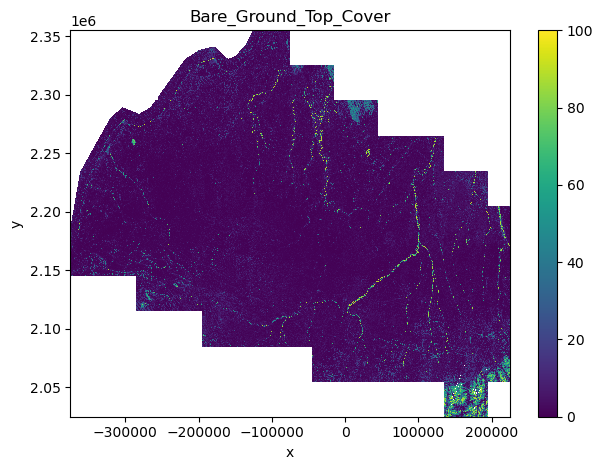

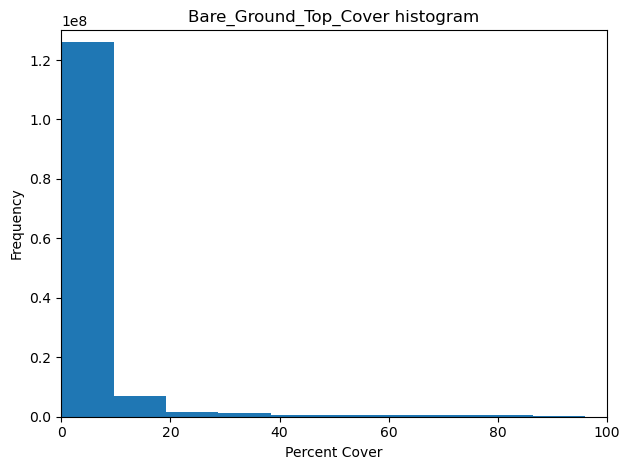

Bryophyte_Total_Cover


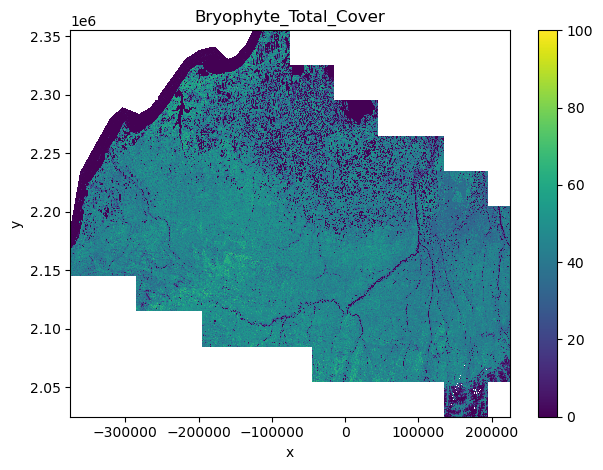

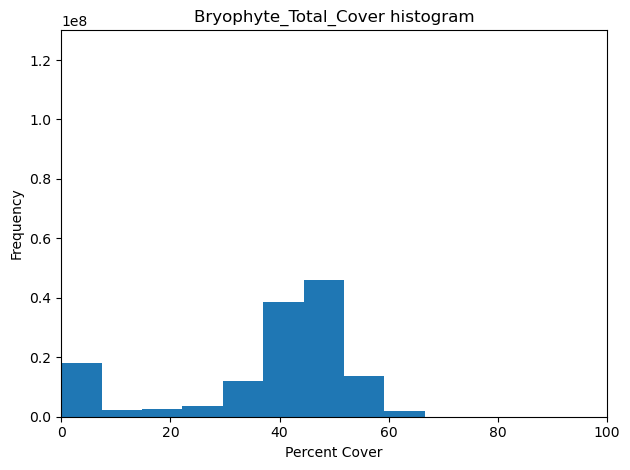

Deciduous_shrub_Total_Cover


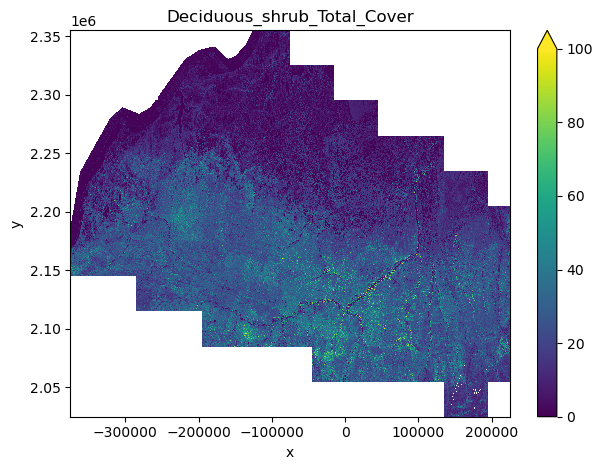

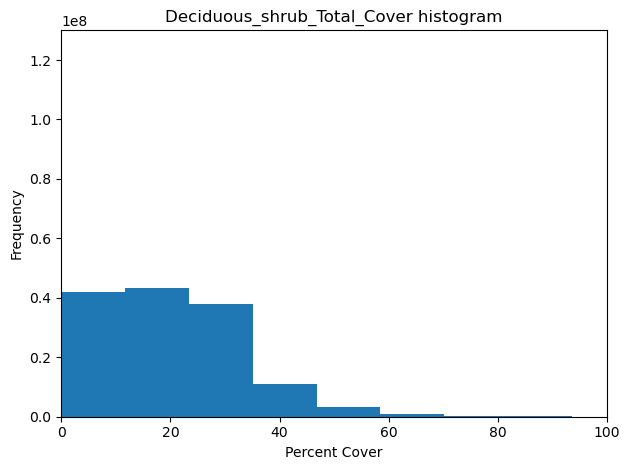

Dwarf_Deciduous_Shrub_Total_Cover


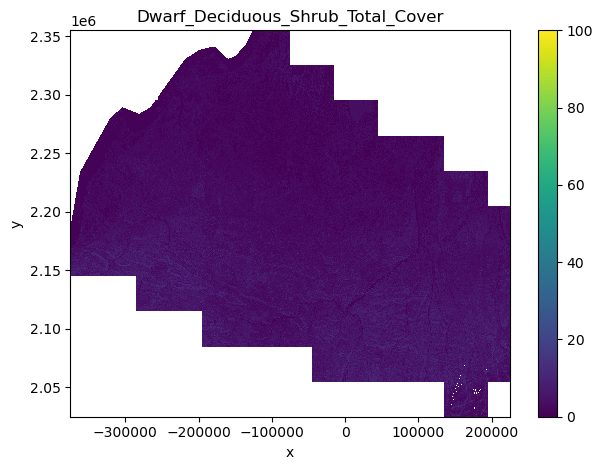

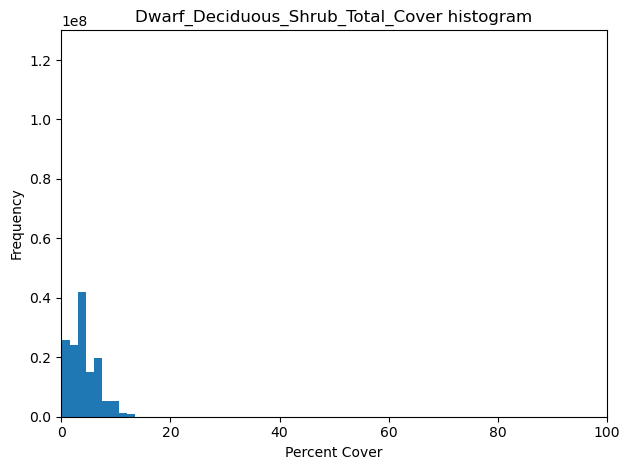

Dwarf_Evergreen_Shrub_Total_Cover


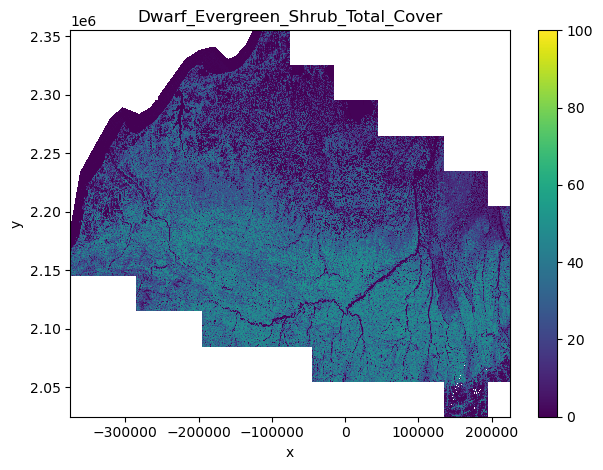

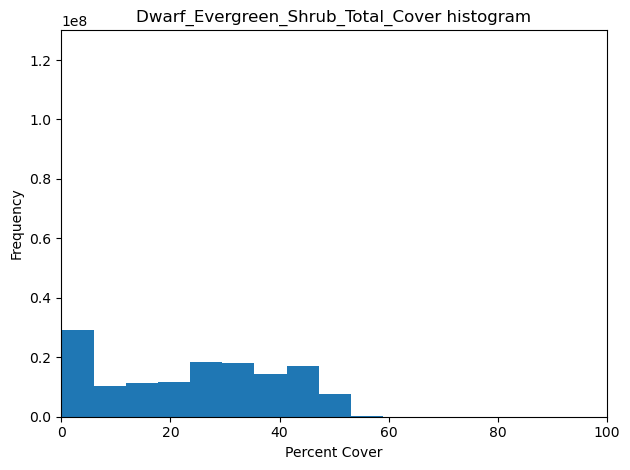

Forb_Total_Cover


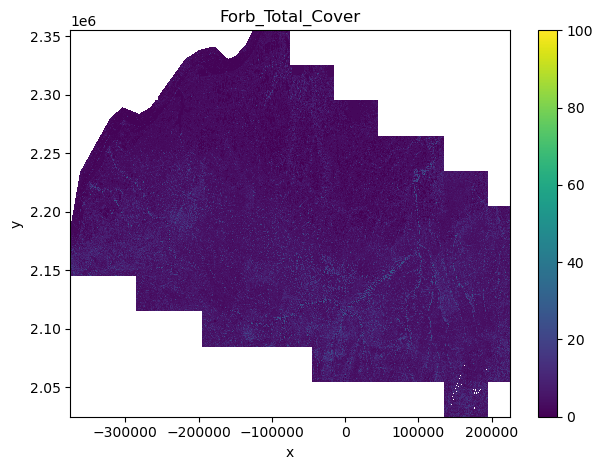

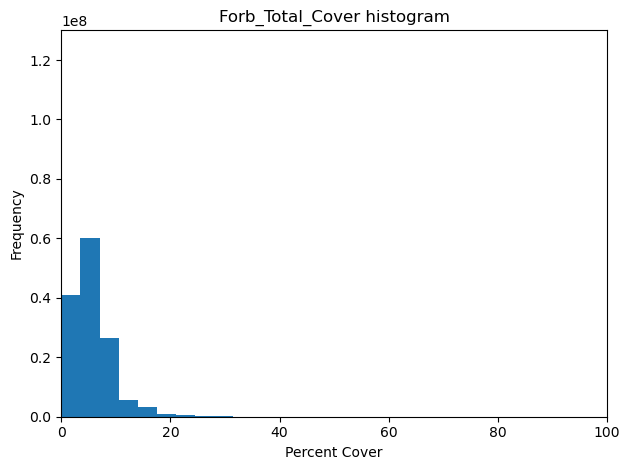

Graminoid_Total_Cover


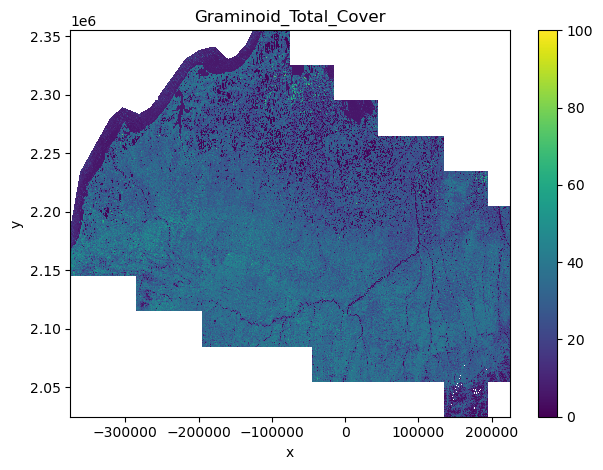

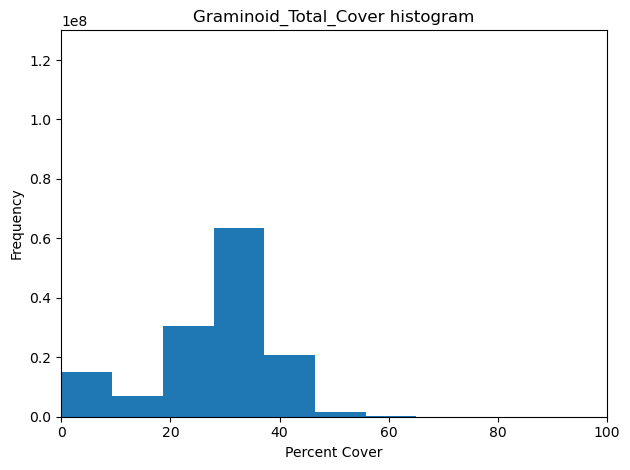

Grass_Total_Cover


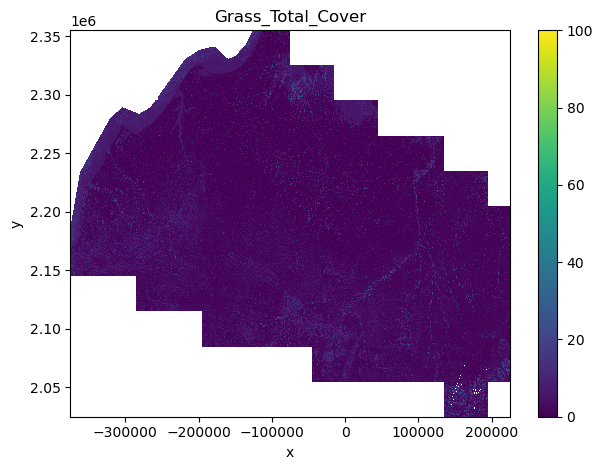

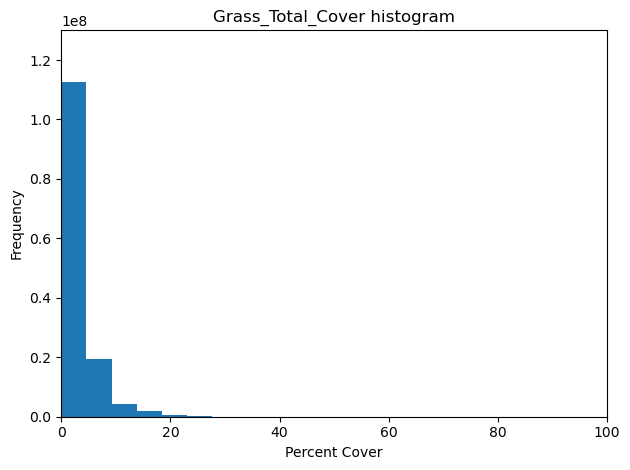

Lichen_Total_Cover


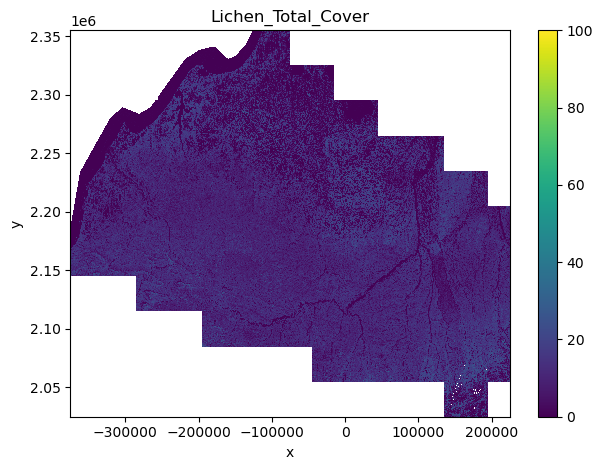

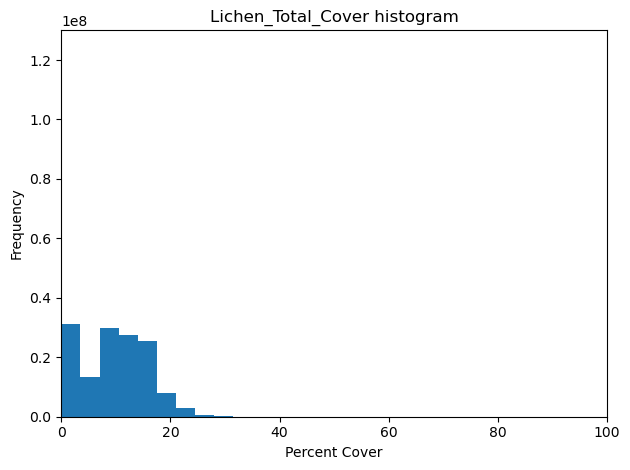

Litter_Top_Cover


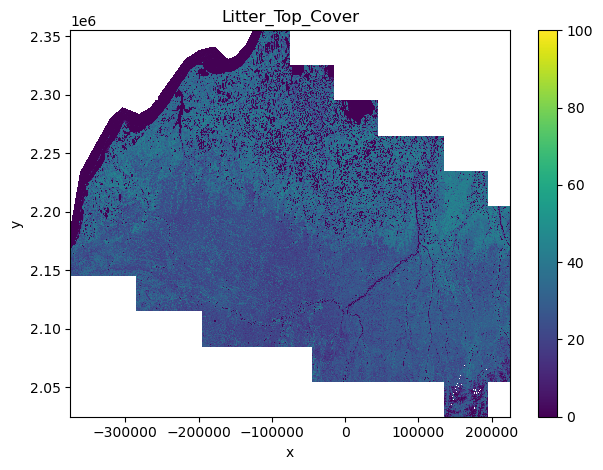

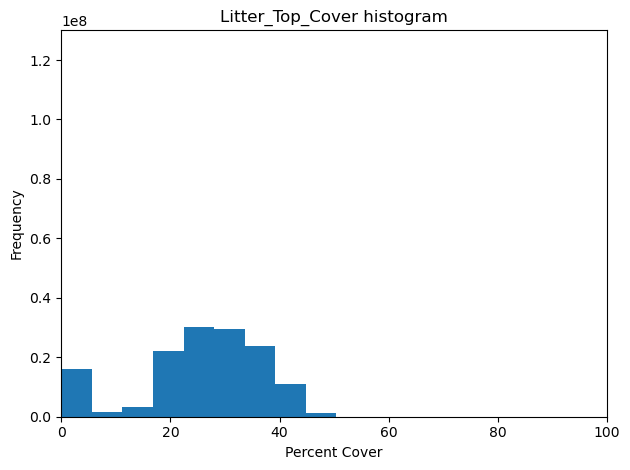

Low_Deciduous_Shrub_Total_Cover


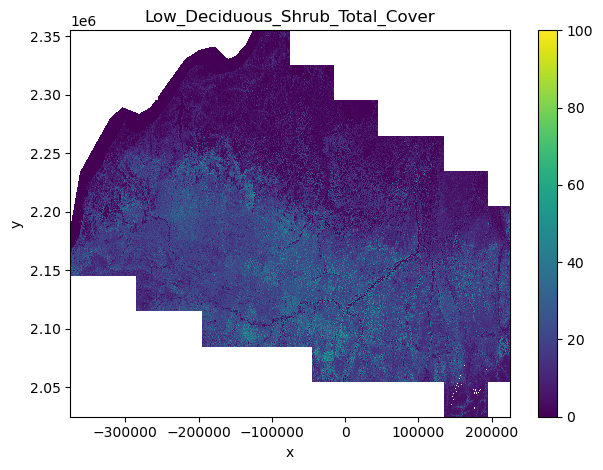

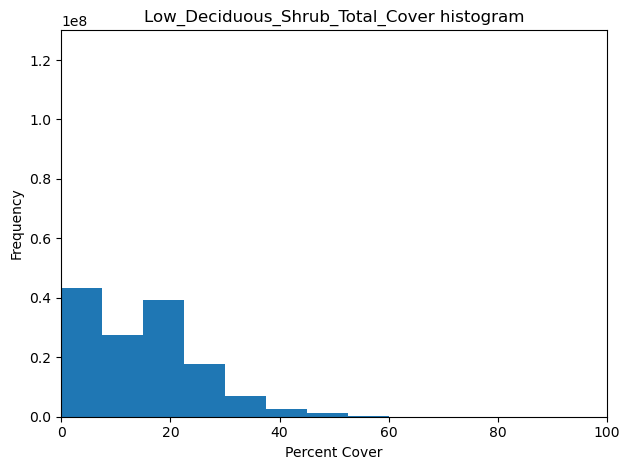

Non_Vascular_Total_Cover


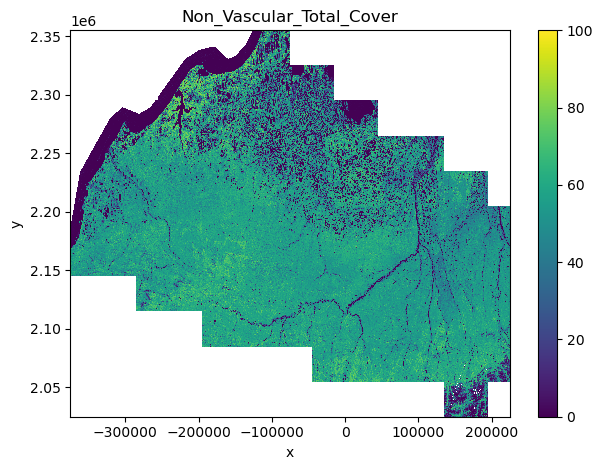

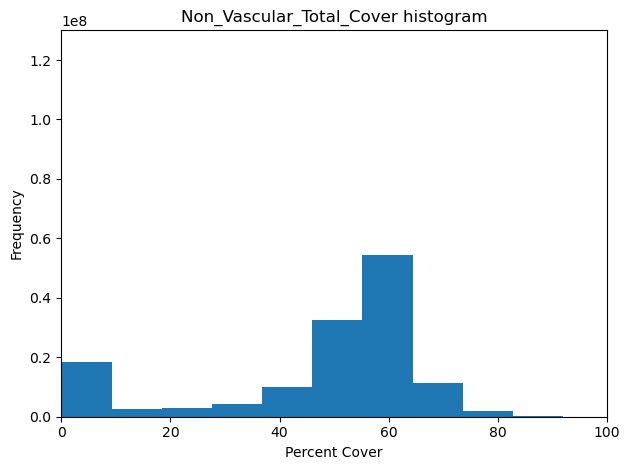

Open_Water_Top_Cover


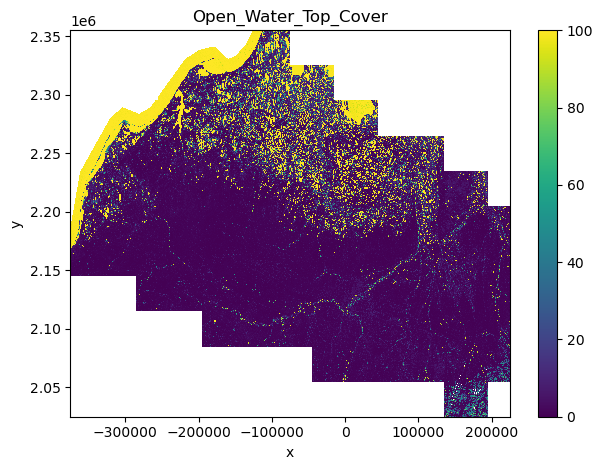

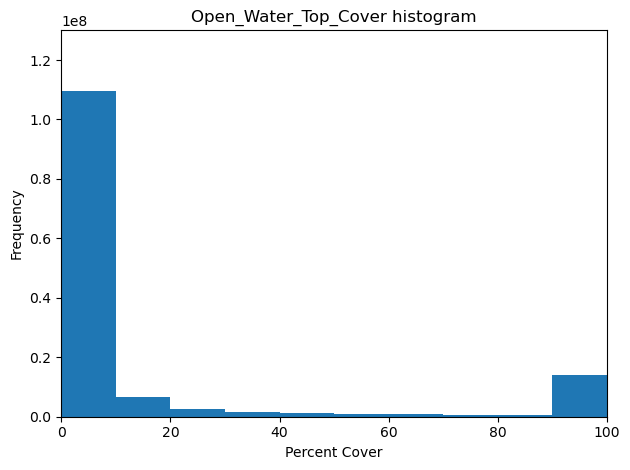

Sedge_Total_Cover


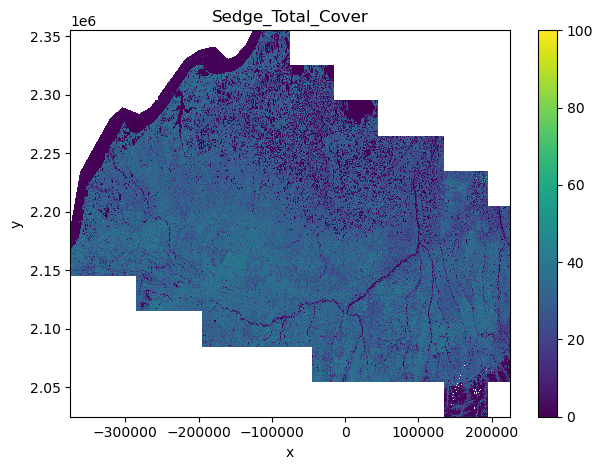

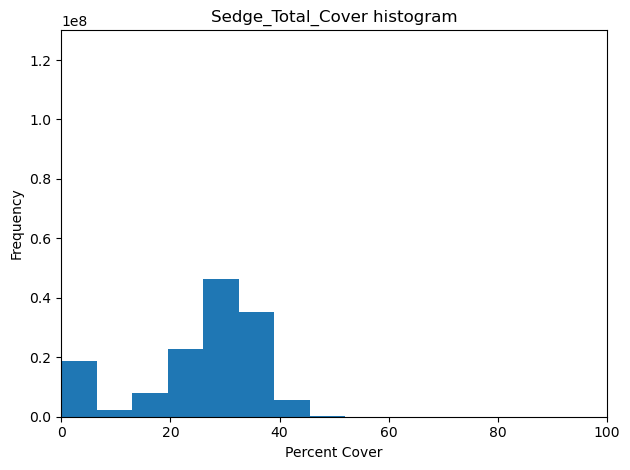

Tall_Deciduous_Shrub_Total_Cover


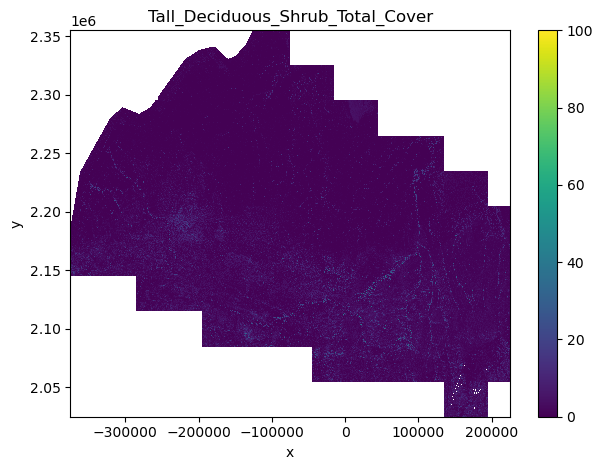

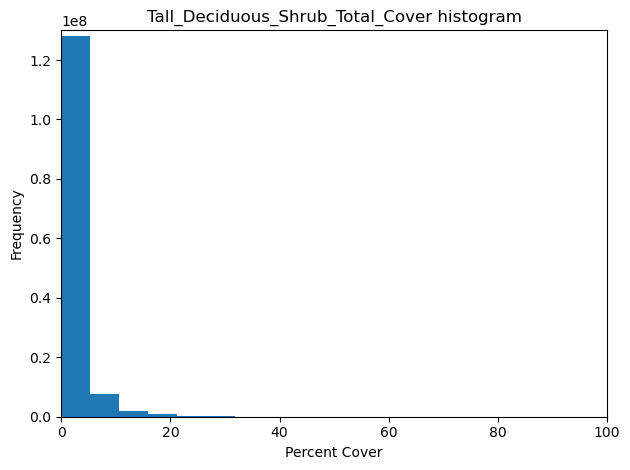

In [56]:
for tif in sorted(glob.glob(f'{p}/*.tif')):
    xds = rioxarray.open_rasterio(tif)
    name = os.path.basename(tif).split('.')[0]
    print(name)
    
    #create map
    xds_masked = xr.where(xds==255, np.nan, xds)
    xds_masked = xr.where(xds_masked < 0, np.nan, xds_masked)
    xds_masked.squeeze().plot.imshow(robust=True, vmin=0, vmax=100)
    plt.title(name)
    plt.tight_layout()
    plt.savefig(f'{p}/{name}_map.png')
    plt.show()
    
    #create histogram
    xr.plot.hist(xds_masked, bins=10)
    plt.title(f'{name} histogram')
    plt.xlabel('Percent Cover')
    plt.ylabel('Frequency')
    plt.ylim(0, 130000000)
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.savefig(f'{p}/{name}_hist.png')
    plt.show()

---

---

---

---

In [35]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [37]:
p = '/mnt/poseidon/remotesensing/arctic/data/vectors/supplementary/tundra_vector/'
f = 'bioclimate_la.shp'
tundra  = gpd.read_file(p + f)

In [38]:
tundra

zone    Shape_Leng    Shape_Area  \
0     0  2.046336e+07  1.697165e+12   
1     1  2.252616e+07  1.946250e+11   
2     2  4.693177e+07  5.116929e+11   
3     3  7.821926e+07  1.301256e+12   
4     4  8.420476e+07  1.576037e+12   
5     5  6.435929e+07  1.841596e+12   
6     6  2.178417e+06  1.128100e+10   

                                            geometry  
0  POLYGON ((2256382.300 2388724.300, 2256920.000...  
1  MULTIPOLYGON (((-702395.200 -1371349.200, -703...  
2  MULTIPOLYGON (((56851.000 -2041863.200, 66567....  
3  MULTIPOLYGON (((-350142.800 -2175830.500, -348...  
4  MULTIPOLYGON (((423453.200 -3229524.700, 42443...  
5  MULTIPOLYGON (((1122941.800 -3265017.500, 1121...  
6  MULTIPOLYGON (((795602.700 -2638938.000, 79615...

In [39]:
p = '/mnt/poseidon/remotesensing/arctic/data/vectors/supplementary/tl_rd22_us_state/'
f = 'tl_rd22_us_state.shp'
states = gpd.read_file(p + f)

In [40]:
ak = states[states['NAME'] == 'Alaska']

In [41]:
ak.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [44]:
tundra.crs.coordinate_operation.to_wkt()

'CONVERSION["unnamed",METHOD["Lambert Azimuthal Equal Area (Spherical)",ID["EPSG",1027]],PARAMETER["Latitude of natural origin",90,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",-180,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]]'

In [46]:
ak = ak.to_crs(tundra.crs.to_wkt())

In [47]:
ak.crs

<Projected CRS: PROJCRS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_A ...>
Name: Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: D_Sphere_ARC_INFO
- Ellipsoid: Sphere_ARC_INFO
- Prime Meridian: Greenwich

<Axes: >

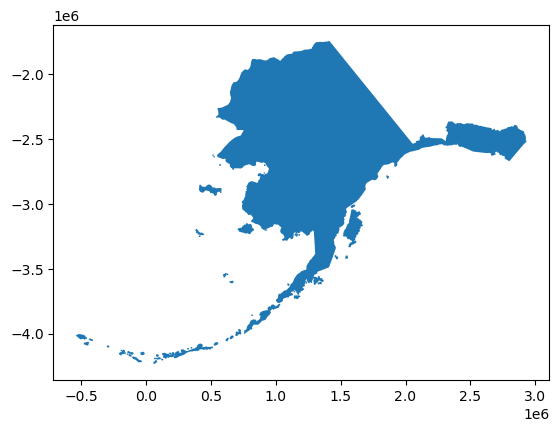

In [48]:
ak.plot()

<Axes: >

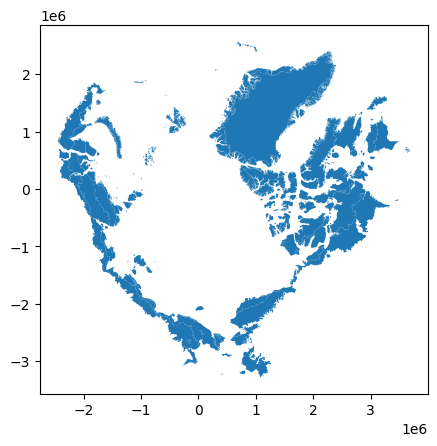

In [49]:
tundra.plot()

In [50]:
tundra_ak = tundra.clip(ak)

<Axes: >

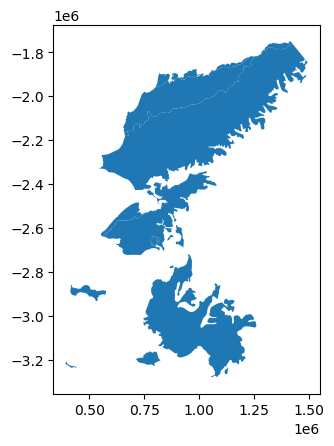

In [51]:
tundra_ak.plot()

In [52]:
p = '/mnt/poseidon/remotesensing/arctic/data/vectors/supplementary/tundra_alaska/'
f = 'tundra_alaska.shp'
tundra_ak.to_file(p + f)

In [96]:
import pandas as pd
import numpy as np
import regex as re

In [97]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_04/'
f = 'ABR_RS_pft_totalcover_merged.csv'
our_summary = pd.read_csv(p + f, index_col=0)

In [98]:
our_summary.set_index('Site Code', drop=True, inplace=True)
our_summary.index.name = 'plot_id'

In [99]:
cover_cols = [col for col in our_summary.columns if 'cover (%)' in col]
our_summary = our_summary[cover_cols]
our_summary

bare ground total cover (%)  bryophyte total cover (%)  \
plot_id                                                            
120712b1                          NaN                      31.77   
120713a1                        28.76                      36.60   
120713b1                          NaN                      17.34   
120714a1                        92.72                       1.32   
120714a2                          NaN                      32.90   
...                               ...                        ...   
120814b1                          NaN                      25.70   
120814b2                          NaN                      13.20   
120814b3                          NaN                      30.46   
120815a1                         3.17                      39.68   
120815b1                          NaN                      43.17   

          deciduous shrub total cover (%)  evergreen shrub total cover (%)  \
plot_id                                                                      
120712b1                            32.45                            20.52   
120713a1                              NaN                              NaN   
120713b1                            11.34                            38.01   
120714a1                              NaN                              NaN   
120714a2                              NaN                            36.19   
...                                   ...                              ...   
120814b1                            11.21                            35.02   
120814b2                            19.45                            27.62   
120814b3                            17.56                            28.68   
120815a1                            47.72                              NaN   
120815b1                            11.36                            38.63   

          forb total cover (%)  fungus total cover (%)  \
plot_id                                                  
120712b1                  2.64                     NaN   
120713a1                  1.96                     NaN   
120713b1                   NaN                     NaN   
120714a1                  1.98                     NaN   
120714a2                  1.98                     NaN   
...                        ...                     ...   
120814b1                  0.20                     NaN   
120814b2                  1.71                     NaN   
120814b3                  1.79                     NaN   
120815a1                 40.28                     NaN   
120815b1                  4.55                     NaN   

          graminoid total cover (%)  lichen total cover (%)  \
plot_id                                                       
120712b1                      19.20                    1.32   
120713a1                      28.75                    0.65   
120713b1                      14.66                    8.66   
120714a1                        NaN                     NaN   
120714a2                      25.67                   34.22   
...                             ...                     ...   
120814b1                      28.57                   19.26   
120814b2                      34.06                   14.71   
120814b3                      23.81                   11.50   
120815a1                      56.05                     NaN   
120815b1                      31.81                   27.27   

          litter total cover (%)  water total cover (%)  
plot_id                                                  
120712b1                   18.54                    NaN  
120713a1                   77.78                    NaN  
120713b1                   32.67                    NaN  
120714a1                   15.23                    NaN  
120714a2                   84.87                    NaN  
...                          ...                    ...  
120814b1                   87.30                    NaN  
120814b2     

In [100]:
our_summary.columns

Index(['bare ground total cover (%)', 'bryophyte total cover (%)',
       'deciduous shrub total cover (%)', 'evergreen shrub total cover (%)',
       'forb total cover (%)', 'fungus total cover (%)',
       'graminoid total cover (%)', 'lichen total cover (%)',
       'litter total cover (%)', 'water total cover (%)'],
      dtype='object')

In [101]:
p = '/mnt/poseidon/remotesensing/arctic/data/vectors/ABR/'
f = 'vpi_plot_summary.csv'
their_summary = pd.read_csv(p + f, index_col=0, usecols=list(np.arange(0,17)))

In [102]:
their_summary.columns

Index(['total_hits', 'decid_tallshrub_cover', 'decid_lowshrub_cover',
       'decid_dwarfshrub_cover', 'evergr_dwarfshrub_cover', 'sedges_cover',
       'grasses_cover', 'forbs_cover', 'mosses_cover', 'lichens_cover',
       'litter_cover', 'water_cover', 'bareground_cover', 'liver_cover',
       'algae_cover', 'fungi_cover'],
      dtype='object')

In [103]:
def standardize_habit(habitrow):
    
    #habitrow = habitrow.to_numpy()
    new_row = []
    
    for habit in habitrow:
        habit = habit.lower()
        if 'algae' in habit or 'lichen' in habit:
            new_habit = 'lichen total cover (%)'
        elif 'mosses' in habit or 'liver' in habit:
            new_habit = 'bryophyte total cover (%)'
        elif 'grasses' in habit or 'sedges' in habit:
            new_habit = 'graminoid total cover (%)'
        elif 'decid_' in habit:
            new_habit = 'deciduous shrub total cover (%)'
        elif 'evergr' in habit:
            new_habit = 'evergreen shrub total cover (%)'
        elif 'forb' in habit:
            new_habit = 'forb total cover (%)'
        elif 'litter' in habit:
            new_habit = 'litter total cover (%)'
        elif 'water' in habit:
            new_habit = 'water total cover (%)'
        elif 'bare' in habit:
            new_habit = 'bare ground total cover (%)'
        elif 'fungi' in habit:
            new_habit = 'fungus total cover (%)'
        else:
            new_habit = f'{habit} cover (%)'
        new_row.append(" ".join(new_habit.split()).lower())
    
    return new_row

In [104]:
agg_cols = standardize_habit(their_summary.columns.tolist())

In [105]:
their_summary.columns = agg_cols

In [106]:
their_summary

total_hits cover (%)  deciduous shrub total cover (%)  \
plot_id                                                           
120716b2                   232                             0.00   
120717a1                   164                             0.00   
120718a1                   473                             0.00   
120718a2                   119                             0.00   
120718b1                   548                            12.00   
...                        ...                              ...   
120814b1                   204                             0.00   
120814b2                   219                             0.00   
120814b3                   196                             0.00   
120815a1                   233                            36.51   
120815b1                   159                             0.00   

          deciduous shrub total cover (%)  deciduous shrub total cover (%)  \
plot_id                                                                      
120716b2                             2.01                             1.34   
120717a1                             8.00                             0.00   
120718a1                             4.58                             9.80   
120718a2                             9.52                             9.52   
120718b1                            18.67                             6.00   
...                                   ...                              ...   
120814b1                             7.94                             3.17   
120814b2                            17.74                             1.61   
120814b3                            11.11                             6.35   
120815a1                            11.11                             0.00   
120815b1                            11.36                             0.00   

          evergreen shrub total cover (%)  graminoid total cover (%)  \
plot_id                                                                
120716b2                             7.38                      10.07   
120717a1                             0.00                      30.00   
120718a1                            25.49                      20.26   
120718a2                             9.52                      28.57   
120718b1                            46.67                      20.00   
...                                   ...                        ...   
120814b1                            30.16                      25.40   
120814b2                            24.19                      32.26   
120814b3                            26.98                      23.81   
120815a1                             0.00                       0.00   
120815b1                            31.82                      29.55   

          graminoid total cover (%)  forb total cover (%)  \
plot_id                                                     
120716b2                       0.00                  6.04   
120717a1                       0.00                 14.00   
120718a1                       0.65                  9.80   
120718a2                       0.00                  4.76   
120718b1                       0.00                  2.00   
...                             ...                   ...   
120814b1                       0.00                  0.00   
120814b2                       0.00                  1.61   
120814b3                       0.00                  1.59   
120815a1                      46.03                 34.92   
120815b1                       2.27                  4.55   

          bryophyte total cover (%)  lichen total cover (%)  \
plot_id                                                       
120716b2                      73.83                    1.34   
120717a1                      18.00                    0.00   
120718a1                      65.36                    7.84   
120718a2                      23.81                    4.76   
120718b1      

In [107]:
their_summary2 = their_summary.copy()
their_summary2 = their_summary2.groupby(lambda x:x, axis=1).sum()
their_summary2.drop(columns=['total_hits cover (%)'], inplace=True)
their_summary2 = their_summary2[sorted(their_summary2.columns.tolist())]

In [108]:
their_summary2.columns

Index(['bare ground total cover (%)', 'bryophyte total cover (%)',
       'deciduous shrub total cover (%)', 'evergreen shrub total cover (%)',
       'forb total cover (%)', 'fungus total cover (%)',
       'graminoid total cover (%)', 'lichen total cover (%)',
       'litter total cover (%)', 'water total cover (%)'],
      dtype='object')

In [109]:
our_summary2 = our_summary[sorted(our_summary.columns.tolist())]
our_summary2.columns

Index(['bare ground total cover (%)', 'bryophyte total cover (%)',
       'deciduous shrub total cover (%)', 'evergreen shrub total cover (%)',
       'forb total cover (%)', 'fungus total cover (%)',
       'graminoid total cover (%)', 'lichen total cover (%)',
       'litter total cover (%)', 'water total cover (%)'],
      dtype='object')

In [112]:
difference = our_summary2.subtract(their_summary2, fill_value=0)

In [113]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_04/'
f = 'our_summary_minus_ABR_summary.csv'
difference.to_csv(p + f)

In [114]:
difference

bare ground total cover (%)  bryophyte total cover (%)  \
plot_id                                                            
120712b1                          0.0                      -0.02   
120713a1                          0.0                       0.00   
120713b1                          0.0                       0.01   
120714a1                          0.0                       0.00   
120714a2                          0.0                       0.01   
...                               ...                        ...   
120814b1                          0.0                       0.31   
120814b2                          0.0                       0.30   
120814b3                          0.0                       0.30   
120815a1                          0.0                       0.00   
120815b1                          0.0                      -0.01   

          deciduous shrub total cover (%)  evergreen shrub total cover (%)  \
plot_id                                                                      
120712b1                             0.66                            -0.01   
120713a1                             0.00                             0.00   
120713b1                             0.00                             4.01   
120714a1                             0.00                             0.00   
120714a2                            -0.66                             5.93   
...                                   ...                              ...   
120814b1                             0.10                             4.86   
120814b2                             0.10                             3.43   
120814b3                             0.10                             1.70   
120815a1                             0.10                             0.00   
120815b1                             0.00                             6.81   

          forb total cover (%)  fungus total cover (%)  \
plot_id                                                  
120712b1                 -0.01                     0.0   
120713a1                  0.00                     0.0   
120713b1                  0.00                     0.0   
120714a1                 -0.01                     0.0   
120714a2                  0.66                     0.0   
...                        ...                     ...   
120814b1                  0.20                     0.0   
120814b2                  0.10                     0.0   
120814b3                  0.20                     0.0   
120815a1                  5.36                     0.0   
120815b1                  0.00                     0.0   

          graminoid total cover (%)  lichen total cover (%)  \
plot_id                                                       
120712b1                      -0.01                    0.00   
120713a1                       0.65                    0.00   
120713b1                      -0.01                   -0.01   
120714a1                       0.00                    0.00   
120714a2                       1.33                    1.33   
...                             ...                     ...   
120814b1                       3.17                    0.21   
120814b2                       1.80                    0.20   
120814b3                       0.00                    0.39   
120815a1                      10.02                    0.00   
120815b1                      -0.01                    2.27   

          litter total cover (%)  water total cover (%)  
plot_id                                                  
120712b1                     0.0                    0.0  
120713a1                     0.0                    0.0  
120713b1                     0.0                    0.0  
120714a1                     0.0                    0.0  
120714a2                     0.0                    0.0  
...                          ...                    ...  
120814b1                     0.0                    0.0  
120814b2     

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import ee
import geemap as gee

In [13]:
ee.Initialize()

In [28]:
# read tundra boundaries
p = '/mnt/poseidon/remotesensing/arctic/data/vectors/supplementary/tundra_alaska/'
f = 'tundra_alaska.shp'
ak_tundra = gpd.read_file(p + f)
fc = gee.geopandas_to_ee(ak_tundra)

In [67]:
# abr
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_04/original_files/'
f = 'ABR_RS_fcover_total_merged.csv'
abr = pd.read_csv(p+f)
# akava
f = 'AKAVA_PARENT_fcover_total_merged.csv'
ava = pd.read_csv(p+f)
# akveg
f = 'AKVEG_AIM_NPRA_fcover_total_merged.csv'
akv = pd.read_csv(p+f)
# neon
f = 'NEON_PARENT_fcover_total_merged.csv'
neo = pd.read_csv(p+f)
# seward
f = 'NGEE_SP_PARENT_fcover_total_merged.csv'
sew = pd.read_csv(p+f)
# baby ava
f = 'AKAVA_fcover_total_merged.csv'
bba = pd.read_csv(p+f)

In [68]:
abr_geom = abr[['Site Code', 'latitude', 'longitude']]
abr_points = gee.df_to_ee(abr_geom, 
                          latitude='latitude', 
                          longitude='longitude')

In [69]:
ava_geom = ava[['Site Code', 'latitude', 'longitude']]
ava_points = gee.df_to_ee(ava_geom, 
                          latitude='latitude', 
                          longitude='longitude')

In [70]:
akv_geom = akv[['Site Code', 'latitude', 'longitude']]
akv_points = gee.df_to_ee(akv_geom, 
                          latitude='latitude', 
                          longitude='longitude')

In [71]:
neo_geom = neo[['Site Code', 'latitude', 'longitude']]
neo_points = gee.df_to_ee(neo_geom, 
                          latitude='latitude', 
                          longitude='longitude')

In [72]:
sew_geom = sew[['Site Code', 'latitude', 'longitude']]
sew_points = gee.df_to_ee(sew_geom, 
                          latitude='latitude', 
                          longitude='longitude')

In [74]:
bba_geom = bba[['Site Code', 'latitude', 'longitude']]
bba_points = gee.df_to_ee(bba_geom, 
                          latitude='latitude', 
                          longitude='longitude')

In [75]:
import seaborn as sns

In [76]:
hexs = sns.color_palette("pastel").as_hex()
hexs2 = sns.color_palette().as_hex()
print(hexs)

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [77]:
paramlist = []
for color, color2 in zip(hexs,hexs2):
    vis_params = {
        'fillColor': color,
        'color': color2,
        'pointSize': 3,
        'pointShape': 'circle',
        'width': 1,
        'lineType': 'solid',
    }
    paramlist.append(vis_params)

In [97]:
vis_params = {
    'color': '000000', 
    'pointSize': 3,
    'pointShape': 'circle',
    'width': 2,
    'lineType': 'solid',
    'fillColor': '00000000',
}

In [118]:
Map = gee.Map()
Map.center_object(fc, 6)
Map.add_basemap('Google Terrain')
Map.addLayer(fc.style(**(vis_params)))
Map.addLayer(abr_points.style(**(paramlist[0])))
Map.addLayer(bba_points.style(**(paramlist[7])))
Map.addLayer(ava_points.style(**(paramlist[1])))
Map.addLayer(akv_points.style(**(paramlist[2])))
Map.addLayer(neo_points.style(**(paramlist[3])))
Map.addLayer(sew_points.style(**(paramlist[4])))
Map.add_legend(labels=['ABR', 'AVA', 'AKVEG', 'NEON', 'SEWARD', 'CHILD_AVA'],
               colors=[hexs[0], hexs[1], hexs[2], hexs[3], hexs[4], hexs[7]])
Map

Map(center=[66.56551547720869, -158.1544109640721], controls=(WidgetControl(options=['position', 'transparent_…

In [1]:
import ee
ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com')

import geemap
import os
import time
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import geopandas as gpd
import pandas as pd
import numpy as np
from mpi4py import MPI

In [31]:
# cloud filter params 
CLOUD_FILTER = 100

##########################################################################################

# area of interest params
# choose bounding area format ('STATE', 'COUNTRY', 'BBOX', 'HUC', 'SHP'):
ROI = 'SHP'

# if ROI = BBOX or SHP (path to .geojson or .shp, otherwise ''):
IN_PATH = '/mnt/poseidon/remotesensing/arctic/data/vectors/supplementary/tundra_alaska/tundra_alaska.shp'
# if ROI = STATE or COUNTRY (administrative boundaries, otherwise None):
COUNTRY = None
# if ROI = HUC, state abbreviation for HUC, if STATE, fulls state name:
STATE = None # 'AK' 
# if ROI = HUC (list of HUC6 units):
HUCLIST = None # must be list: ['190604', '190603', '190602']

##########################################################################################

# buffer around point to find median of intersecting pixel values
POINTBUFFER = 30 # meters

##########################################################################################

# output file
DIR_PATH = '/mnt/poseidon/remotesensing/arctic/data/rasters/S2SR/training_test04'
if not os.path.isdir(DIR_PATH):
    os.mkdir(DIR_PATH)
    
# data Information
IDCOL = 'Site Code'
SCALE = 20
BANDS = ['B5']
start_date = date(2019, 6, 1)# Y-M-D (2019, 1, 1)
end_date = date(2019, 8, 31) # Y-M-D minus 5 for even 'days' intervals (6 days for 2020)
TIMESTEP = None # 'months', 'days', or None
DAYS = '' # if TIMESTEP = days
MONTHS = '' # if TIMESTEP = 'months': years * 12

In [32]:
if TIMESTEP == None:

    date_ranges = [(start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))]

else:

    print("Invalid TIMESTEP selection. Use 'days', 'months', or None.")

In [33]:
if ROI == 'SHP':
    geodataframe = gpd.read_file(IN_PATH)
    grid_location_ee = geemap.geopandas_to_ee(geodataframe)
    
else:
    print('Invalid region of interest. Check STATE, COUNTRY, HUC')
    quit

In [34]:
##########################################################################################
# AKVEG test 04
di = '/mnt/poseidon/remotesensing/arctic/data/training/Test_04/original_files/'
fi = 'AKVEG_AIM_NPRA_fcover_total_merged.csv'
obs_data = pd.read_csv(di + fi)

# extract geometry and unique ID
akv_geom = obs_data[['latitude', 
                     'longitude', 
                     'Site Code']]
print(len(akv_geom))
akv_geom.columns = ['latitude', 'longitude', 'Site Code']

##########################################################################################
# ABR_RS test 04
di = '/mnt/poseidon/remotesensing/arctic/data/training/Test_04/original_files/'
fi = 'ABR_RS_fcover_total_merged.csv'
obs_data = pd.read_csv(di + fi)

# extract geometry and unique ID
abr_geom = obs_data[['latitude', 
                     'longitude', 
                     'Site Code']]
print(len(abr_geom))
abr_geom.columns = ['latitude', 'longitude', 'Site Code']

##########################################################################################
# combine
obs_geom = pd.concat([akv_geom, abr_geom], 
                     axis=0, 
                     ignore_index=True)
print(len(obs_geom))

# create ee object (feature collection)
obs_geom = obs_geom.reset_index()
obs_points = geemap.df_to_ee(obs_geom,
                             latitude='latitude',
                             longitude='longitude')
print(obs_points.size().getInfo())

##########################################################################################
#sub-select points and extract geometry

# select points that intercept HUC
samplepoints = obs_points.filterBounds(grid_location_ee)

# create dictionary of grid coordinates
points_dict = samplepoints.getInfo()
feats = points_dict['features']

# get ID column
unique_ids = []
for f in feats:
    id = f['properties'][IDCOL]
    unique_ids.append(id)

# Create a list of several ee.Geometry.Polygons
points = []
for f in feats:
    coords = f['geometry']['coordinates']
    point = ee.Geometry.Point(coords)
    # create buffer around point for later reduce regions
    buffered = point.buffer(POINTBUFFER)
    points.append(buffered)

# Make a feature collection for export purposes
points_ee = ee.FeatureCollection(points)
print(f'{len(points)} {POINTBUFFER}-meter buffered points.')

185
107
292
292
291 30-meter buffered points.


In [ ]:
Map = geemap.map()

In [42]:
CURRENTBANDS = 'B5'
PATH = f'{DIR_PATH}/{CURRENTBANDS}'

In [43]:
def mask_s2_clouds(image):
    # select bitmask band
    qa = image.select('QA60')

    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloud_bit_mask = 1 << 10
    cirrus_bit_mask = 1 << 11

    # Both flags should be set to zero, indicating clear conditions.
    mask = (qa.bitwiseAnd(cloud_bit_mask).eq(0).And
            (qa.bitwiseAnd(cirrus_bit_mask).eq(0)))

    return image.updateMask(mask)

def add_variables(image):
    # Compute time in fractional years since the epoch.
    date = ee.Date(image.get('system:time_start')).millis()
    # Return the image with the added bands.
    return (image
            .addBands(ee.Image(date).rename('date').float())
           )

In [44]:
s2_sr_col = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                .filterBounds(samplepoints)
                .filterDate(str(start_date), str(end_date))
                #.filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_FILTER))
            )

everyband = [CURRENTBANDS]
everyband = everyband + ['date']
s2_sr = (s2_sr_col.map(mask_s2_clouds).map(add_variables)).select(everyband)

print("Cloud and shadow mask applied to tiles. Date band created.")

Cloud and shadow mask applied to tiles. Date band created.


In [45]:
def ee_to_df(ee_object, col_names, sort_columns=False):
    if isinstance(ee_object, ee.Feature):
        ee_object = ee.FeatureCollection([ee_object])

    if not isinstance(ee_object, ee.FeatureCollection):
        raise TypeError("ee_object must be an ee.FeatureCollection")

    try:
        property_names = ee_object.first().propertyNames().sort().getInfo()
        #data = ee_object.map(lambda f: ee.Feature(None, f.toDictionary(property_names)))
        data = ee_object
        data = [x["properties"] for x in data.getInfo()["features"]]
        df = pd.DataFrame(data)

        if col_names is None:
            col_names = property_names
            col_names.remove("system:index")
        elif not isinstance(col_names, list):
            raise TypeError("col_names must be a list")

        df = df[col_names]

        if sort_columns:
            df = df.reindex(sorted(df.columns), axis=1)

        return df
    
    except Exception as e:
        raise Exception(e)

In [46]:
# Loop through date ranges and export sampled composites
for RANGE in date_ranges:
    
    # select cloud-filtered sentinel 2 imagery for time step
    print(RANGE[0], RANGE[1])
    s2_by_date = s2_sr.filterDate(RANGE[0], RANGE[1])
    sentinel2 = s2_by_date.filterBounds(points_ee)
    
    # get band names
    b_list = [CURRENTBANDS]
    b_list = [f'{b}_median' for b in b_list]
    b_list = b_list + ['date_first']
    print(b_list)

    # if image collection has images:
    if sentinel2.size().getInfo() != 0:

        # create composite for time step
        # ee.reduce(reducer) adds _reducer to band name
        composite = (sentinel2.select(CURRENTBANDS)).reduce(ee.Reducer.median())
        composite_date = (sentinel2.select('date')).reduce(ee.Reducer.first())
        composite = composite.addBands(composite_date)

        # sample composite using point buffers (returns feature collection)
        # gets median of all pixels in buffer
        print('Sampling...')
        sampled = composite.reduceRegions(points_ee,
                                          scale = SCALE,
                                          reducer = ee.Reducer.median(),
                                          crs = 'EPSG:4326')
        
        # export feature collection as csv
        FILE = f'{PATH}/{RANGE[0]}_to_{RANGE[1]}.csv'
        if os.path.isfile(FILE):
            print('FILE:', FILE, ' ALREADY EXISTS', flush=True)
        else:
            
            # export to dataframe
            df = ee_to_df(sampled, col_names=b_list)
            df[IDCOL] = unique_ids
            df.to_csv(FILE)
            print(f'Saved to {FILE}')

    # if image collection doesn't have images:
    else:
        
        FILE = f'{PATH}/{RANGE[0]}_to_{RANGE[1]}.csv'
        if os.path.isfile(FILE):
            print('FILE:', FILE, ' ALREADY EXISTS', flush=True)
        else:
            # create dataframe from original point data
            df = pd.DataFrame(unique_ids, columns=[IDCOL])
            df.loc[:, b_list] = np.nan
            df.to_csv(FILE)
            print(f'No images in collection. Saved dummy data to {FILE}')

2019-06-01 2019-08-31
['B5_median', 'date_first']
Sampling...
Saved to /mnt/poseidon/remotesensing/arctic/data/rasters/S2SR/training_test04/B5/2019-06-01_to_2019-08-31.csv


In [125]:
import pandas as pd
import numpy as np
import glob
import warnings
warnings.filterwarnings("ignore")

In [126]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_05/temp'
files = sorted(glob.glob(f'{p}/*_child.csv'))
dfs = []
for file in files:
    df = pd.read_csv(file, index_col=0)
    dfs.append(df)

In [127]:
def create_new_dfs(dfs):
    
    newdfs = []
    
    def merge(test):

        # extract evergreen/decid shrub/tree col names
        evergreen = sorted([col for col in test.columns if all(k in col for k in ['evergreen dwarf'])])
        deciduous = sorted([col for col in test.columns if any(k in col for k in ['deciduous dwarf'])])
        evergtree = sorted([col for col in test.columns if all(k in col for k in ['evergreen tree'])])
        decidtree = sorted([col for col in test.columns if all(k in col for k in ['deciduous tree'])])
        nonvasc = sorted([col for col in test.columns if any(k in col for k in ['lichen', 'bryophyte'])])

        # select cols and set as new dataframe
        e_shrub = test[evergreen]
        d_shrub = test[deciduous]
        e_tree = test[evergtree]
        d_tree = test[decidtree]
        n_vasc = test[nonvasc]

        # sum sub-categories into new main category and select
        # shrubs
        e_shrub['evergreen shrub total cover (%)'] = e_shrub.sum(axis=1)
        e_shrub = e_shrub[['evergreen shrub total cover (%)']]
        d_shrub['deciduous shrub total cover (%)'] = d_shrub.sum(axis=1)
        d_shrub = d_shrub[['deciduous shrub total cover (%)']]
        # trees
        e_tree['evergreen tree total cover (%)'] = e_tree.sum(axis=1)
        e_tree = e_tree[['evergreen tree total cover (%)']]
        d_tree['deciduous tree total cover (%)'] = d_tree.sum(axis=1)
        d_tree = d_tree[['deciduous tree total cover (%)']]
        #non-vascular
        n_vasc['non-vascular total cover (%)'] = n_vasc.sum(axis=1)
        n_vasc = n_vasc[['non-vascular total cover (%)']]

        # drop old sub-columns and replace with new
        subcats = evergreen + deciduous + evergtree + decidtree + nonvasc
        cats = test.drop(columns=subcats) # get everything but leafy plants
        aggregated = pd.concat([e_shrub, e_tree, d_shrub, d_tree, n_vasc, cats], axis=1)
        return aggregated
    
    for df in dfs:
        temp = merge(df)
        cover = sorted([col for col in temp if 'cover' in col])
        other = sorted([col for col in temp if 'cover' not in col])
        c = temp[cover]
        o = temp[other]
        newdf = pd.concat([c,o], axis=1)
        newdfs.append(newdf)
        
    return newdfs

In [128]:
new_dfs = create_new_dfs(dfs)

In [130]:
for file, new_df in zip(files, new_dfs):
    p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_05/fcover'
    filename = file.split('/')[-1]
    new_df.to_csv(f'{p}/{filename}')

In [137]:
# again but for parents
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_05/temp'
files = sorted(glob.glob(f'{p}/*_parent.csv'))
dfs = []
for file in files:
    df = pd.read_csv(file, index_col=0)
    dfs.append(df)

In [138]:
new_dfs = create_new_dfs(dfs)

In [139]:
for file, new_df in zip(files, new_dfs):
    p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_05/fcover'
    filename = file.split('/')[-1]
    new_df.to_csv(f'{p}/{filename}')

In [57]:
import geopandas as gpd
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [58]:
p = '/mnt/poseidon/remotesensing/arctic/data/vectors/supplementary/'
f = 'historical_fire_perimeters/InterAgencyFirePerimeterHistory_All_Years_View.shp'
fire_perim = gpd.read_file(p + f)

In [59]:
fire_perim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
p = '/mnt/poseidon/remotesensing/arctic/data/training/Test_05/fcover'
f = '/*.csv'
fcover_files = sorted(glob.glob(p+f))
coverdfs = []
for coverfile in fcover_files:
    df = pd.read_csv(coverfile, index_col=0)
    coverdfs.append(df)

In [61]:
cover_geodfs = []
for coverdf in coverdfs:
    gdf = gpd.GeoDataFrame(data=coverdf, 
                           geometry=gpd.points_from_xy(coverdf.longitude, 
                                                       coverdf.latitude),
                           crs='EPSG:4326')
    cover_geodfs.append(gdf)

In [62]:
cover_merged = pd.concat(cover_geodfs)

In [63]:
# USA background
basedir = '/mnt/poseidon/remotesensing/arctic'
USADATA = f'{basedir}/data/vectors/supplementary/tl_rd22_us_state'
usa = gpd.read_file(USADATA)
usa = usa.to_crs('EPSG:4326')

(67.5, 72.5)

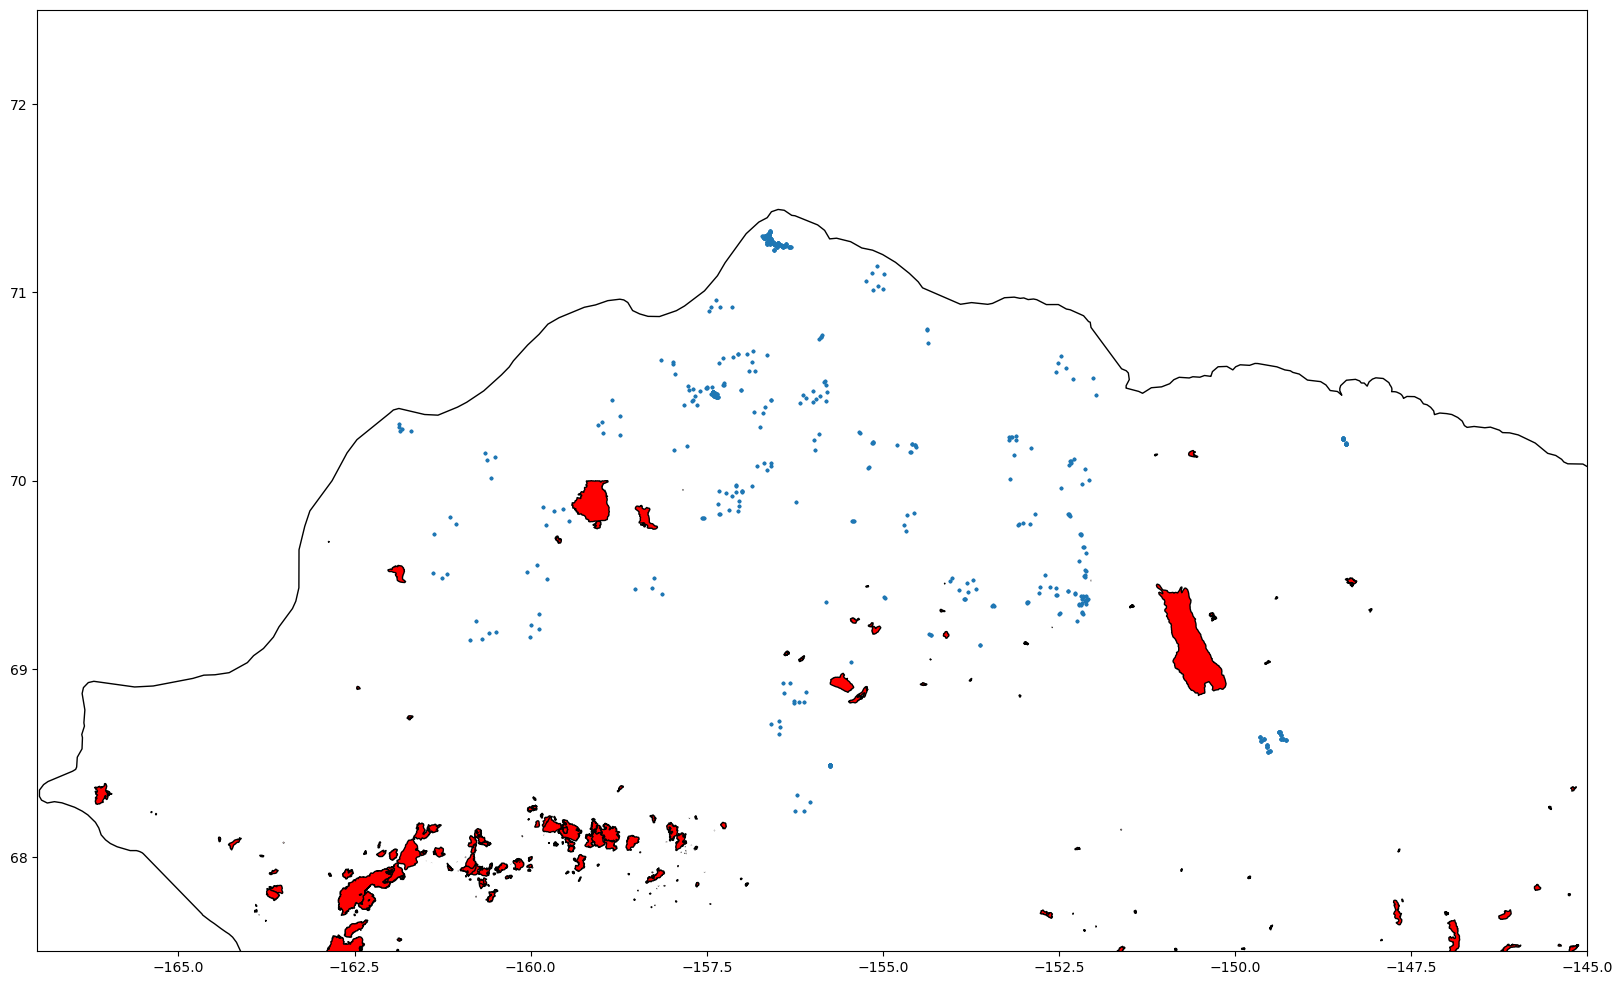

In [68]:
fig, ax = plt.subplots(figsize = (20,20)) 
usa.plot(ax=ax, color='white', edgecolor='black')
fire.plot(ax=ax, color='red', edgecolor='black')
cover_merged.plot(ax=ax, markersize=3)
ax.set_xlim(-167, -145)
ax.set_ylim(67.5, 72.5)

In [65]:
intersections = []
for cover_geodf in cover_geodfs:
    fire = fire_perim[['OBJECTID', 'FIRE_YEAR', 'geometry']]
    intersection = gpd.overlay(cover_geodf, fire, how='intersection')
    intersections.append(intersection)

In [66]:
pd.concat(intersections)

Empty GeoDataFrame
Columns: [bare ground top cover (%), deciduous shrub total cover (%), deciduous tree total cover (%), evergreen shrub total cover (%), evergreen tree total cover (%), forb total cover (%), graminoid total cover (%), litter total cover (%), non-vascular total cover (%), water top cover (%), latitude, longitude, plot_radius_m, source, year, OBJECTID, FIRE_YEAR, geometry, subsource, dead herbaceous total cover (%), dead woody total cover (%), child_site_codes]
Index: []

[0 rows x 22 columns]